# CAPSTONE PROJECT

Amazon is an online shopping website that now caters to millions of people everywhere. Over 34,000 consumer reviews for Amazon brand products like Kindle, Fire TV Stick and more are provided. 
The dataset has attributes like brand, categories, primary categories, reviews.title, reviews.text, and the sentiment. Sentiment is a categorical variable with three levels "Positive", "Negative“, and "Neutral". For a given unseen data, the sentiment needs to be predicted.
You are required to predict Sentiment or Satisfaction of a purchase based on multiple features and review text.
Dataset Snapshot



Project Task: Week 1

Class Imbalance Problem:

1. Perform an EDA on the dataset.

       a)  See what a positive, negative, and neutral review looks like

       b)  Check the class count for each class. It’s a class imbalance problem.

2. Convert the reviews in Tf-Idf score.

3. Run multinomial Naive Bayes classifier. Everything will be classified as positive because of the class imbalance.

Project Task: Week 2

Tackling Class Imbalance Problem:

Oversampling or undersampling can be used to tackle the class imbalance problem. 
In case of class imbalance criteria, use the following metrices for evaluating model performance: precision, recall, F1-score, AUC-ROC curve. Use F1-Score as the evaluation criteria for this      project.
Use Tree-based classifiers like Random Forest and XGBoost.
       Note: Tree-based classifiers work on two ideologies namely, Bagging or Boosting and have fine-tuning parameter which takes care of the imbalanced class.

Project Task: Week 3

Model Selection:

Apply multi-class SVM’s and neural nets.
Use possible ensemble techniques like: XGboost + oversampled_multinomial_NB.
Assign a score to the sentence sentiment (engineer a feature called sentiment score). Use this engineered feature in the model and check for improvements. Draw insights on the same.
Project Task: Week 4

Applying LSTM:

Use LSTM for the previous problem (use parameters of LSTM like top-word, embedding-length, Dropout, epochs, number of layers, etc.)
       Hint: Another variation of LSTM, GRU (Gated Recurrent Units) can be tried as well.

      2. Compare the accuracy of neural nets with traditional ML based algorithms.

      3. Find the best setting of LSTM (Neural Net) and GRU that can best classify the reviews as positive, negative, and neutral. 

       Hint: Use techniques like Grid Search, Cross-Validation and Random Search


Import required libraries

In [ ]:
import pandas as pd
import numpy as np

Upload the data files to python environment as DataFrames

In [3]:
train_df=pd.read_csv("D:\\Users\\happy\\Downloads\\New folder\\Ecommerce\\train_data.csv")
test_df=pd.read_csv("D:\\Users\\happy\\Downloads\\New folder\\Ecommerce\\test_data.csv")
test_hidden_df=pd.read_csv("D:\\Users\\happy\\Downloads\\New folder\\Ecommerce\\test_data_hidden.csv")

Show the first five observations

In [4]:
train_df.head()

,name,brand,categories,primaryCategories,reviews.date,reviews.text,reviews.title,sentiment
0,"All-New Fire HD 8 Tablet, 8"" HD Display, Wi-Fi...",Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...",Electronics,2016-12-26T00:00:00.000Z,Purchased on Black FridayPros - Great Price (e...,Powerful tablet,Positive
1,Amazon - Echo Plus w/ Built-In Hub - Silver,Amazon,"Amazon Echo,Smart Home,Networking,Home & Tools...","Electronics,Hardware",2018-01-17T00:00:00.000Z,I purchased two Amazon in Echo Plus and two do...,Amazon Echo Plus AWESOME,Positive
2,Amazon Echo Show Alexa-enabled Bluetooth Speak...,Amazon,"Amazon Echo,Virtual Assistant Speakers,Electro...","Electronics,Hardware",2017-12-20T00:00:00.000Z,Just an average Alexa option. Does show a few ...,Average,Neutral
3,"Fire HD 10 Tablet, 10.1 HD Display, Wi-Fi, 16 ...",Amazon,"eBook Readers,Fire Tablets,Electronics Feature...","Office Supplies,Electronics",2017-08-04T00:00:00.000Z,"very good product. Exactly what I wanted, and ...",Greattttttt,Positive
4,"Brand New Amazon Kindle Fire 16gb 7"" Ips Displ...",Amazon,"Computers/Tablets & Networking,Tablets & eBook...",Electronics,2017-01-23T00:00:00.000Z,This is the 3rd one I've purchased. I've bough...,Very durable!,Positive


In [5]:
positive=train_df[train_df["sentiment"]=="Positive"]
negative=train_df[train_df["sentiment"]=="Negative"]
neutral=train_df[train_df["sentiment"]=="Neutral"]

check the count each class

In [6]:
print(positive["sentiment"].value_counts())
print(negative["sentiment"].value_counts())
print(neutral["sentiment"].value_counts())

Positive    3749
Name: sentiment, dtype: int64
Negative    93
Name: sentiment, dtype: int64
Neutral    158
Name: sentiment, dtype: int64


Store only the required data into dataframe, as only text and target are required

In [12]:
data=train_df[["sentiment","reviews.text"]]

In [13]:
print(data.shape)
data.head()

(4000, 2)


,sentiment,reviews.text
0,Positive,Purchased on Black FridayPros - Great Price (e...
1,Positive,I purchased two Amazon in Echo Plus and two do...
2,Neutral,Just an average Alexa option. Does show a few ...
3,Positive,"very good product. Exactly what I wanted, and ..."
4,Positive,This is the 3rd one I've purchased. I've bough...


Check the class Imbalance visually using matplotlib

In [32]:
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns

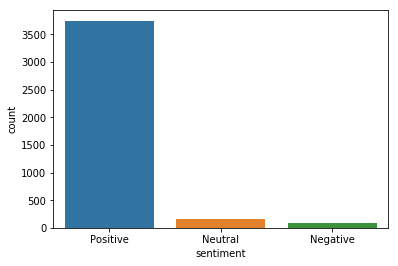

In [34]:
sns.countplot(data["sentiment"])

Its is clearly class imbalance problem

# Text preprocessing

Import all the required libraries for text preprocesing

In [8]:
from nltk.tokenize import RegexpTokenizer
from nltk.stem import RegexpStemmer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords,wordnet

In [9]:
lemmatizer=WordNetLemmatizer()
tokenizer=RegexpTokenizer(r'[a-z]+')
import nltk
nltk.download('wordnet')
#Download Stopwords
nltk.download('stopwords')
stopwords=set(stopwords.words("english"))


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


Define a function for preprocessing

In [10]:
def preprocess(text):
    text=text.lower()
    words=tokenizer.tokenize(text)
    words=[w for w in text if not w in stopwords]
    for pos in [wordnet.NOUN, wordnet.VERB, wordnet.ADJ, wordnet.ADV]:
        words=[lemmatizer.lemmatize(x, pos) for x in words]
    return ''.join(words)
    

In [11]:
from nltk.corpus import stopwords
wordnet_lemmatizer = WordNetLemmatizer()
tokenizer = RegexpTokenizer(r'[a-z]+')
stop_words = set(stopwords.words('english'))
def preprocess(document):
    document = document.lower() # Convert to lowercase
    words = tokenizer.tokenize(document) # Tokenize
    words = [w for w in words if not w in stop_words] # Removing stopwords
    # Lemmatizing
    for pos in [wordnet.NOUN, wordnet.VERB, wordnet.ADJ, wordnet.ADV]:
        words = [wordnet_lemmatizer.lemmatize(x, pos) for x in words]
    return " ".join(words)

In [12]:
data["processed_review"]=data['reviews.text'].apply(preprocess)

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [13]:
data.head()

,sentiment,reviews.text,processed_review
0,Positive,Purchased on Black FridayPros - Great Price (e...,purchase black fridaypros great price even sal...
1,Positive,I purchased two Amazon in Echo Plus and two do...,purchase two amazon echo plus two dot plus fou...
2,Neutral,Just an average Alexa option. Does show a few ...,average alexa option show thing screen still l...
3,Positive,"very good product. Exactly what I wanted, and ...",good product exactly want good price
4,Positive,This is the 3rd one I've purchased. I've bough...,rd one purchase buy one niece case compare one...


In [14]:
data1=data.drop(['reviews.text'],axis=1)

In [15]:
data1.head()

,sentiment,processed_review
0,Positive,purchase black fridaypros great price even sal...
1,Positive,purchase two amazon echo plus two dot plus fou...
2,Neutral,average alexa option show thing screen still l...
3,Positive,good product exactly want good price
4,Positive,rd one purchase buy one niece case compare one...


In [16]:
import string
import re

In [17]:
def textpreprocessing(data1):
    no_punc=[char for char in data1 if not char in string.punctuation]
    sent_without_punc=''.join(no_punc)
    words=sent_without_punc.split()
    remove_stopwords=[word for word in words if  word.lower() not in stop_words]
    
    return remove_stopwords
    
    

In [18]:
data1['processed_review'].head().apply(textpreprocessing)

0    [purchase, black, fridaypros, great, price, ev...
1    [purchase, two, amazon, echo, plus, two, dot, ...
2    [average, alexa, option, show, thing, screen, ...
3          [good, product, exactly, want, good, price]
4    [rd, one, purchase, buy, one, niece, case, com...
Name: processed_review, dtype: object

Convert the text data to numeric or vectors

In [19]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer(analyzer=textpreprocessing).fit(data1['processed_review'])

In [20]:
len(cv.vocabulary_)

3407

In [21]:
bag_of_words=cv.transform(data1["processed_review"])

In [22]:
from sklearn.feature_extraction.text import TfidfTransformer
tfidf=TfidfTransformer().fit(bag_of_words)
tfidf1=tfidf.transform(bag_of_words)

In [23]:
tfidf1.shape

(4000, 3407)

In [24]:
tfidf1

<4000x3407 sparse matrix of type '<type 'numpy.float64'>'
	with 54229 stored elements in Compressed Sparse Row format>


# Multinomial NB 

Import ,initiate and apply Multinomial NB

In [25]:
from sklearn.naive_bayes import MultinomialNB

In [26]:
nb=MultinomialNB().fit(tfidf1 ,data1["sentiment"])

In [27]:
test="i hate the product"
test_text_preprocess=textpreprocessing(test)
test_vect=cv.transform(test_text_preprocess)
trans_test=tfidf.transform(test_vect)
pred=nb.predict(trans_test)

Even the test statement is that negative the outcome has came out to be positive

this is due to class imbalance

In [28]:
pred

array(['Positive', 'Positive'], dtype='|S8')

In [29]:
columns=data1.columns.to_list()
columns=[c for c in columns if not c in ["sentiment"]]
state = np.random.RandomState(42)


In [30]:
columns

['processed_review']

In [31]:
x=data1[columns]
y=data1['sentiment']

In [32]:
print(x.shape)
print(y.shape)

(4000, 1)
(4000,)


As its a class Imbalance problem, Balance using imblearn

In [33]:
!pip install imblearn

In [34]:
from imblearn.over_sampling import RandomOverSampler
ros=RandomOverSampler(random_state=0)
x_res,y_res=ros.fit_sample(x,y)


In [35]:
x_res.shape , y_res.shape

((11247, 1), (11247,))

In [36]:
from collections import Counter

In [37]:
print(Counter(y_res))

Counter({'Positive': 3749, 'Neutral': 3749, 'Negative': 3749})


In [38]:
x1=pd.DataFrame(x_res,columns=['processed_review'])
y1=pd.DataFrame(y_res,columns=["sentiment"])

In [39]:
final=pd.concat([x1,y1],axis=1)

In [40]:
final.head()

,processed_review,sentiment
0,purchase black fridaypros great price even sal...,Positive
1,purchase two amazon echo plus two dot plus fou...,Positive
2,average alexa option show thing screen still l...,Neutral
3,good product exactly want good price,Positive
4,rd one purchase buy one niece case compare one...,Positive


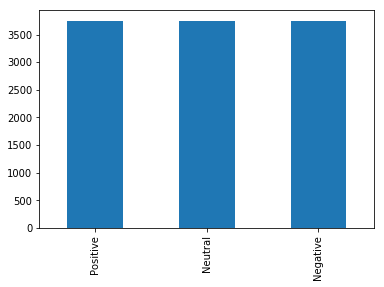

In [41]:
import matplotlib.pyplot as plt

final["sentiment"].value_counts().plot(kind="bar")

Balanced  now

Split the data into testing and training datasets using train test split

In [42]:
from sklearn.model_selection import train_test_split

In [43]:
df = final.sample(frac=0.1, random_state=0) 
df.shape

(1125, 2)

In [44]:
df.head()

,processed_review,sentiment
8805,buy think would great read book play game howe...,Neutral
9736,good tablet kid lot appts download game,Neutral
125,item work expect great product,Positive
10143,great beginner like child limit use many apps ...,Neutral
10937,buy kindle past time one come defective port b...,Neutral


In [45]:
final.head()

,processed_review,sentiment
0,purchase black fridaypros great price even sal...,Positive
1,purchase two amazon echo plus two dot plus fou...,Positive
2,average alexa option show thing screen still l...,Neutral
3,good product exactly want good price,Positive
4,rd one purchase buy one niece case compare one...,Positive


In [46]:
xtrain,xtest,ytrain,ytest=train_test_split(df["processed_review"],df["sentiment"])

In [47]:
cv1=CountVectorizer()

In [48]:
xtranformed=cv1.fit_transform(xtrain)
xtest_transform=cv1.transform(xtest)
len(cv1.get_feature_names())

1481

In [49]:
mnb=MultinomialNB()

In [50]:
mnb.fit(xtranformed,ytrain)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [51]:
ypred=mnb.predict(xtest_transform)

In [52]:
from sklearn.metrics import recall_score,precision_score,f1_score,accuracy_score,confusion_matrix,classification_report


In [53]:
print(accuracy_score(ytest,ypred))


0.8652482269503546


In [54]:
print(recall_score(ytest,ypred,average=None))
print(f1_score(ytest,ypred,average=None))
print(precision_score(ytest,ypred,average=None))
print(confusion_matrix(ytest,ypred))
print(classification_report(ytest,ypred))



[0.90217391 0.87254902 0.81818182]
[0.90710383 0.86407767 0.82285714]
[0.91208791 0.85576923 0.82758621]
[[83  2  7]
 [ 5 89  8]
 [ 3 13 72]]
              precision    recall  f1-score   support

    Negative       0.91      0.90      0.91        92
     Neutral       0.86      0.87      0.86       102
    Positive       0.83      0.82      0.82        88

   micro avg       0.87      0.87      0.87       282
   macro avg       0.87      0.86      0.86       282
weighted avg       0.87      0.87      0.87       282



# Now create a model using Random Forest classifier

In [55]:
from sklearn.ensemble import RandomForestClassifier

In [56]:
rf=RandomForestClassifier(n_estimators=100)

In [57]:
rf.fit(xtranformed,ytrain)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [58]:
predrf=rf.predict(xtest_transform)

In [59]:
print(accuracy_score(predrf,ytest))

0.9290780141843972


# XG BOOST

In [60]:
from xgboost import XGBClassifier

In [61]:
xgb=XGBClassifier()

In [62]:
xgb.fit(xtranformed,ytrain)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='multi:softprob', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [63]:
xgbpred=xgb.predict(xtest_transform)

In [64]:
print(accuracy_score(xgbpred,ytest))

0.8156028368794326


In [65]:
from sklearn.svm import SVC

In [66]:
sv=SVC()

In [67]:
sv.fit(xtranformed,ytrain)

/usr/local/lib/python2.7/dist-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [68]:
svpred=sv.predict(xtest_transform)

In [69]:
print(accuracy_score(svpred,ytest))

0.40070921985815605


Accuracy is very low, try using grid search

# GRID SEARCH CV

In [70]:
from sklearn.model_selection import GridSearchCV
param_grid={'C':[0.1,1,100,1000],'gamma':[1,0.1,0.01,0.001]}

In [71]:
grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=4)
grid.fit(xtranformed,ytrain)


Fitting 3 folds for each of 16 candidates, totalling 48 fits
[CV] C=0.1, gamma=1 ..................................................


/usr/local/lib/python2.7/dist-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s


[CV] ............. C=0.1, gamma=1, score=0.351063829787, total=   0.1s
[CV] C=0.1, gamma=1 ..................................................
[CV] .............. C=0.1, gamma=1, score=0.35231316726, total=   0.1s
[CV] C=0.1, gamma=1 ..................................................
[CV] ............. C=0.1, gamma=1, score=0.360714285714, total=   0.1s
[CV] C=0.1, gamma=0.1 ................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.5s remaining:    0.0s


[CV] ........... C=0.1, gamma=0.1, score=0.390070921986, total=   0.1s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ........... C=0.1, gamma=0.1, score=0.348754448399, total=   0.1s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ........... C=0.1, gamma=0.1, score=0.421428571429, total=   0.1s
[CV] C=0.1, gamma=0.01 ...............................................
[CV] .......... C=0.1, gamma=0.01, score=0.347517730496, total=   0.1s
[CV] C=0.1, gamma=0.01 ...............................................
[CV] .......... C=0.1, gamma=0.01, score=0.345195729537, total=   0.1s
[CV] C=0.1, gamma=0.01 ...............................................
[CV] .......... C=0.1, gamma=0.01, score=0.371428571429, total=   0.1s
[CV] C=0.1, gamma=0.001 ..............................................
[CV] ......... C=0.1, gamma=0.001, score=0.343971631206, total=   0.1s
[CV] C=0.1, gamma=0.001 ..............................................
[CV] .

[Parallel(n_jobs=1)]: Done  48 out of  48 | elapsed:    6.5s finished


GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'C': [0.1, 1, 100, 1000], 'gamma': [1, 0.1, 0.01, 0.001]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=4)

In [72]:
grid_pred = grid.predict(xtest_transform)


In [73]:
print(accuracy_score(ytest,grid_pred))

0.9219858156028369


There is a pretty much rise in accuracy 

before performing Grid search-40%

After Grid Search =92%

# Now using Neural networks and LSTM

In [74]:
from tensorflow import keras
from keras.preprocessing import sequence
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Lambda
from keras.layers.embeddings import Embedding
from keras.layers.recurrent import LSTM, SimpleRNN, GRU


Using TensorFlow backend.


In [84]:
top_words = 20000 
maxlen = 100 
batch_size = 32
nb_classes = 3
nb_epoch = 3

In [85]:
from keras.preprocessing.text import Tokenizer

In [93]:
tokenizer=Tokenizer(nb_words=top_words)
tokenizer.fit_on_texts(xtrain)
sequences_train=tokenizer.texts_to_sequences(xtrain)
sequences_test=tokenizer.texts_to_sequences(xtest)
xtrain_seq=sequence.pad_sequences(sequences_train,maxlen=maxlen)
xtest_seq=sequence.pad_sequences(sequences_test,maxlen=maxlen)

In [105]:
model=Sequential()
model.add(Embedding(top_words,128))
model.add(LSTM(128,dropout_W=0.2,dropout_U=0.2))
model.add(Dense(nb_classes))
model.add(Activation("softmax"))

model.summary()


/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:3: UserWarning: Update your `LSTM` call to the Keras 2 API: `LSTM(128, dropout=0.2, recurrent_dropout=0.2)`
  This is separate from the ipykernel package so we can avoid doing imports until


Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, None, 128)         2560000   
_________________________________________________________________
lstm_3 (LSTM)                (None, 128)               131584    
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 387       
_________________________________________________________________
activation_1 (Activation)    (None, 3)                 0         
Total params: 2,691,971
Trainable params: 2,691,971
Non-trainable params: 0
_________________________________________________________________


In [117]:
from sklearn.preprocessing import OneHotEncoder

In [120]:
le=OneHotEncoder()
y_train_n=pd.get_dummies(ytrain)
y_test_n=pd.get_dummies(ytest)

In [125]:
y_train_en[:20]

array([0, 1, 1, 2, 2, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 2, 1, 2, 0, 1])

In [124]:

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

model.fit(xtrain_seq, y_train_n, batch_size=batch_size, nb_epoch=nb_epoch, verbose=1)

# Model Evaluation
score = model.evaluate(xtest_seq, y_test_n, batch_size=batch_size)

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:6: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  
/usr/local/lib/python2.7/dist-packages/tensorflow_core/python/framework/indexed_slices.py:433: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Epoch 1/3
843/843 [==============================] - 6s 7ms/step - loss: 0.6282 - accuracy: 0.6667
Epoch 2/3
843/843 [==============================] - 5s 6ms/step - loss: 0.4838 - accuracy: 0.7631
Epoch 3/3
282/282 [==============================] - 0s 1ms/step


# Camparision between neural networks and traditional ML techniques

In [146]:
accuracy_comparision={'LSTM':0.91,'Grid search using SVM':0.92,'XGboost':0.82,"Multinomial nb":0.86}
df_accuracy_comparision=pd.DataFrame(list(accuracy_comparision.items()),columns=['model','accuracy'])

In [147]:
df_accuracy_comparision

,model,accuracy
0,Multinomial nb,0.86
1,LSTM,0.91
2,XGboost,0.82
3,Grid search using SVM,0.92
